# Continuous Control

---

Congratulations for completing the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control an agent in a more challenging environment, where the goal is to train a creature with four arms to walk forward.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import time
from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Crawler.app"`
- **Windows** (x86): `"path/to/Crawler_Windows_x86/Crawler.exe"`
- **Windows** (x86_64): `"path/to/Crawler_Windows_x86_64/Crawler.exe"`
- **Linux** (x86): `"path/to/Crawler_Linux/Crawler.x86"`
- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`
- **Linux** (x86, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86"`
- **Linux** (x86_64, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86_64"`

For instance, if you are using a Mac, then you downloaded `Crawler.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Crawler.app")
```

In [2]:
env = UnityEnvironment(file_name='Crawler_Linux/Crawler.x86')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
nn_agents = num_agents
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
The state for the first agent looks like: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.25000000e+00
  1.00000000e+00  0.00000000e+00  1.78813934e-07  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.06093168e-01 -1.42857209e-01 -6.06078804e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.33339906e+00 -1.42857209e-01
 -1.33341408e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.0609

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
# #     if np.any(dones):                                  # exit loop if episode finished
# #         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
agent = Agent(state_size, action_size, random_seed = 1, n_agents = nn_agents)

Episode: 	1000  	Score: 	17.06 	Average Score: 12.655
Episode: 	2000  	Score: 	28.16 	Average Score: 20.744
Episode: 	3000  	Score: 	13.36 	Average Score: 17.577
Episode: 	4000  	Score: 	22.74 	Average Score: 14.444
Episode: 	5000  	Score: 	17.29 	Average Score: 15.255
Episode: 	6000  	Score: 	19.19 	Average Score: 16.099
Episode: 	7000  	Score: 	9.41 	Average Score: 14.2001
Episode: 	8000  	Score: 	12.49 	Average Score: 11.099
Episode: 	9000  	Score: 	9.90 	Average Score: 9.46660
Episode: 	10000  	Score: 	15.41 	Average Score: 15.788


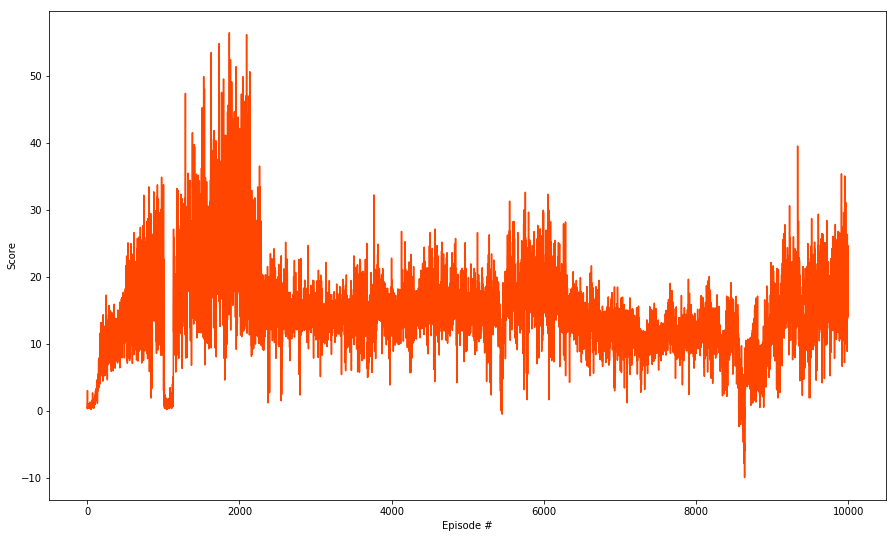

time cost 33757.01079440117 s


In [8]:
def ddpg_train_random_noise():
    # Training
    epochs = 10000
    max_t = 1000
    print_every = 1000

    # for rolling average returns over 100 epsiodes
    scores_deque = deque(maxlen = print_every)
    scores = []
    for i_episode in range(1,epochs+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(nn_agents)
        while True:
            actions = agent.act(states)
#             Execute the clip operation here.
            actions = np.clip(actions, -1, 1)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
#             for s,a,r,ns,d in zip(states, actions, rewards, next_states, dones):
#                 agent.step(s,a,r,ns,d)
            agent.step(states, actions, rewards, next_states, dones)
            score += rewards                      # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any( dones ):                                          # exit loop if episode finished        
                break  
        scores.append(np.mean(score))
        scores_deque.append(np.mean(score))
        
        print('\rEpisode: \t{}  \tScore: \t{:.2f} \tAverage Score: \t{:.2f}'\
              .format(i_episode,np.mean(score), np.mean(scores_deque)), end="")  
        torch.save(agent.actor_local.state_dict(), 'Crawler_checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'Crawler_checkpoint_critic.pth')
        
        if i_episode % print_every == 0:
            print('\rEpisode: \t{}  \tScore: \t{:.2f} \tAverage Score: {:.2f}'.format(i_episode, np.mean(score),np.mean(scores_deque)))
            
            
        if np.mean(scores_deque) >= 400.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'Crawler_bkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'Crawler_bkpoint_critic.pth')
            break    

    figsize = 15,9
    figure, ax = plt.subplots(figsize=figsize)


    plt.plot(np.arange(1, len(scores)+1), scores, color='orangered' )

    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.savefig('crawl1.png')
    plt.show()

    
time_start=time.time()
ddpg_train_random_noise()
time_end=time.time()
print('time cost',time_end-time_start,'s')

In [9]:
agent_test = Agent(state_size, action_size, random_seed = 1, n_agents = nn_agents)
agent_test.actor_local.load_state_dict(torch.load('Crawler_checkpoint_actor.pth', map_location = 'cpu'))
agent_test.critic_local.load_state_dict(torch.load('Crawler_checkpoint_critic.pth', map_location = 'cpu'))

max_t = 1000
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
agent_test.reset()
score = []

while True:
    actions = agent_test.act(states,add_noise = False)
    env_info = env.step(actions)[brain_name]
    states = env_info.vector_observations
    rewards = env_info.rewards
    dones = env_info.local_done
    score.append(np.mean(rewards))
    if np.any( dones ):                                          # exit loop if episode finished      
        print("Total average score:", np.sum(score) )
        break

Total average score: 16.331028264714405
